In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Data Science and Analytics/WTF Data Science and AI/Datasets/Python /Breast cancer (Wisconsin) data.xlsx', index_col= [0])

In [ ]:
# first glance, checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [ ]:
#checking the first five rows of the dataset
df.reset_index(drop= True, inplace= True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# checking the number of null values
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# checking for duplicated entries
df.duplicated().sum()

0

__There are no null values and no duplicated entries in the dataset__

In [ ]:
df.diagnosis.replace({ 'M' : 'Malignant', 'B': 'Benign'}, inplace = True)

__EDA__

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


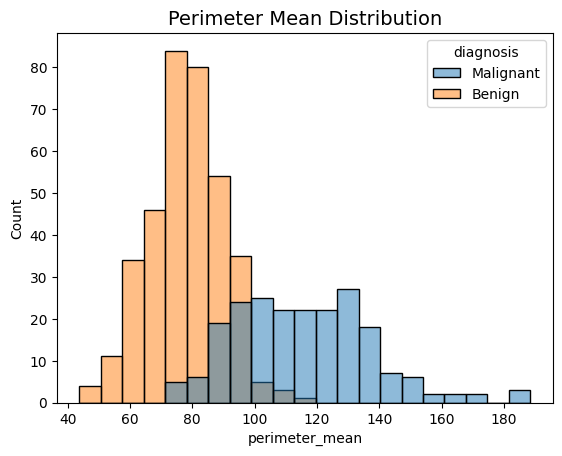

In [ ]:
# checking the distribution of the perimeter mean
plt.title('Perimeter Mean Distribution', fontsize = 14)
sns.histplot(data= df, x = 'perimeter_mean', hue = 'diagnosis')
plt.show()

__Most of the Patients have Perimeter mean of between 70 and 90, and are mostly benign cases__

__The Malignant cancer cells have bigger perimeter mean which can be as a result of their irregular shape and aggressive growth behaviour__

__Those with perimeter_ mean >180 are outliers and represent the worst cases__

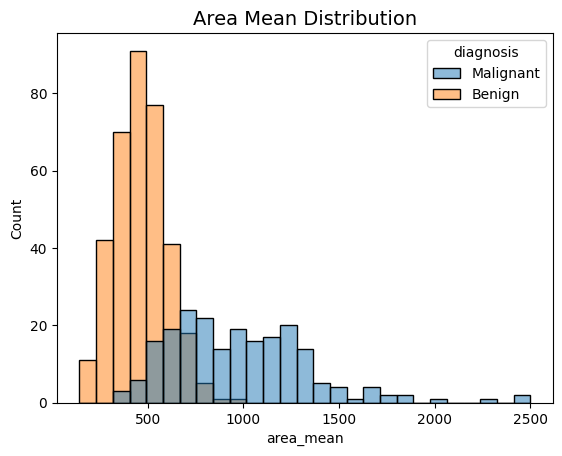

In [ ]:
# checking the distribution of the area mean
plt.title('Area Mean Distribution', fontsize = 14)
sns.histplot(data= df, x = 'area_mean', hue = 'diagnosis')
plt.show()

__Most of the Patients have area mean of between 400 and 600__
__Those with area mean >= 2000 are outliers, and represent the worst cases__

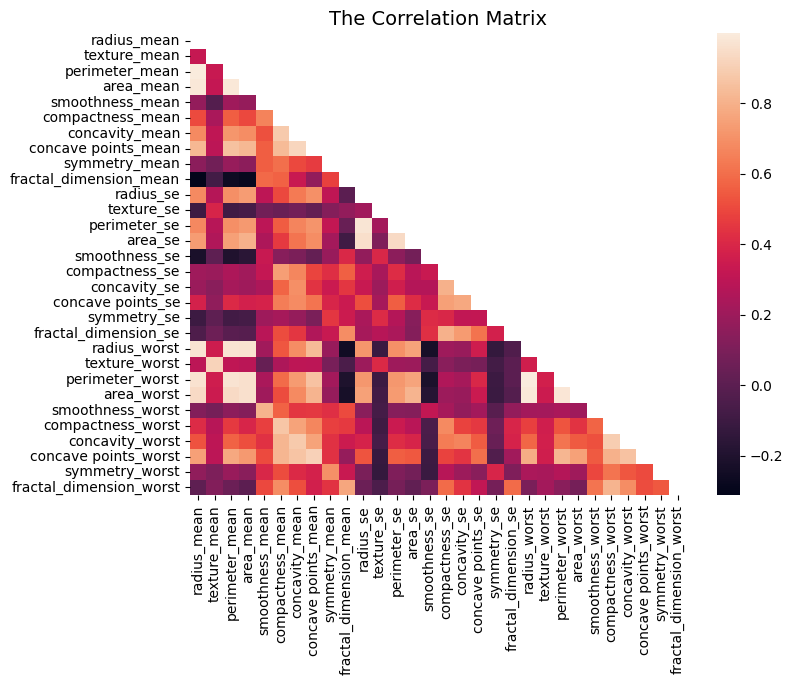

In [ ]:
#correlation

corr =  df.corr(numeric_only=True)
matrix = np.triu(corr) # getting the upper triangle

plt.figure(figsize= (8 , 6))
plt.title('The Correlation Matrix', fontsize=14)
sns.heatmap(corr , mask = matrix)
plt.show()

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

__There is a strong correlation between the area mean and radius mean, as well as the perimeter mean and radius mean__

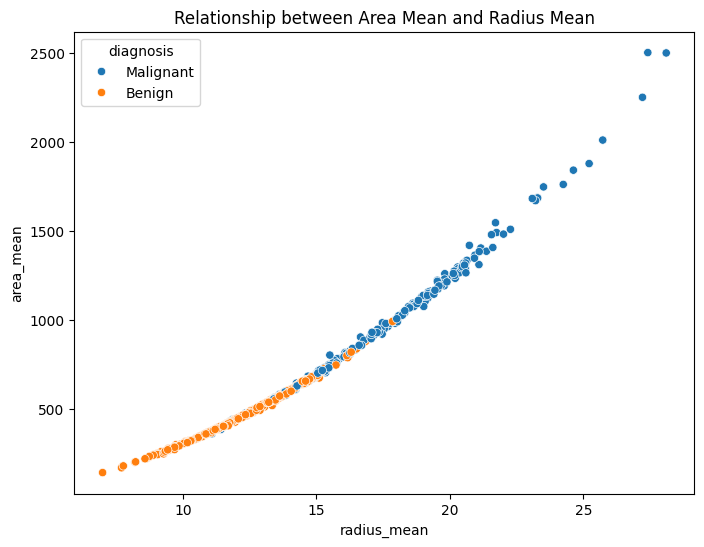

In [ ]:
plt.figure(figsize= (8, 6))
sns.scatterplot(data = df, x = 'radius_mean' , y = 'area_mean' , hue = 'diagnosis')
plt.title('Relationship between Area Mean and Radius Mean')
plt.show()

__Patients diagonized with benign cancer cells have lesser area_mean and radius_mean__

__Those with malignant cancer cells have much higher area and radius mean__

__This shows that early detection and treatment can prevent cancer from getting worse__

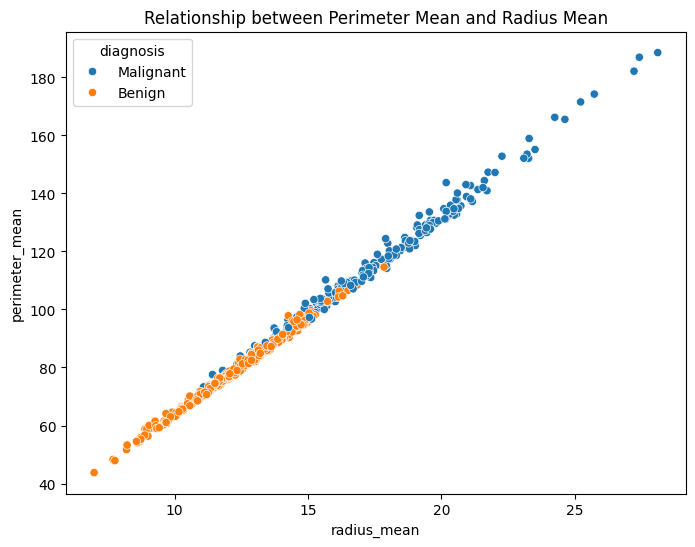

In [ ]:
plt.figure(figsize= (8, 6))
sns.scatterplot(data = df, x = 'radius_mean' , y = 'perimeter_mean' , hue = 'diagnosis')
plt.title('Relationship between Perimeter Mean and Radius Mean')
plt.show()

__Increasing perimeter and radius mean indicate larger tumour sizes or more aggressive growth patterns__

__CONCLUSION__



__Regular screening to detect abnormalities in cell size and shape can help identify potentially malignant cancer cells at an early stage__

__Early detection and treatment can prevent cancer from getting worse__




__Modeling__

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

__Categorical encoding__

In [ ]:
encoder = LabelEncoder()
df.diagnosis = encoder.fit_transform(df.diagnosis)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# splitting the dataframe into train and test
x = df.drop(columns= 'diagnosis')
y = df.diagnosis

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

__LogisticRegression__

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
clf.score(x_test, y_test)

0.956140350877193

In [ ]:
# prediction
predY = clf.predict(x_test)

In [ ]:
# checking the number of correctly classified data points per class
confusion_matrix(y_test, predY)

array([[70,  1],
       [ 4, 39]])

In [ ]:
print(classification_report(y_test, predY))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=400, max_depth=15, min_samples_split=5, criterion= 'entropy')

In [ ]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       n_estimators=400)

In [ ]:
rf_clf.score(x_test, y_test)

0.9649122807017544

In [ ]:
# prediction
predY = rf_clf.predict(x_test)

In [ ]:
confusion_matrix(y_test, predY)

array([[70,  1],
       [ 3, 40]])

In [ ]:
print(classification_report(y_test, predY))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



__Hyperparameter Tuning__

In [ ]:
param = {'n_estimators': [10, 50, 100, 200, 300, 400], 'max_depth': [5, 10, 15, 20, 25], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}

In [ ]:
grid_clf = GridSearchCV(rf_clf, param, cv = 5)

In [ ]:
grid_clf.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=400),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20, 25],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200, 300, 400]})

In [ ]:
grid_clf.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_split': 5,
 'n_estimators': 400}